In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa              
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import random
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [ ]:
genres_musicaux = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

print(genres_musicaux)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
for g in genres_musicaux:
  filenames = os.listdir(os.path.join('/content/gdrive/MyDrive/Projet Majeure/Data/images_original/',f'{g}'))
  random.shuffle(filenames)
  test_files = filenames[0:15]

  for f in test_files:
 
    shutil.move('/content/gdrive/MyDrive/Projet Majeure/Data/images_original/' + f'{g}'+ '/' + f,'/content/gdrive/MyDrive/Projet Majeure/Data/images_validation/' + f'{g}')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Projet Majeure/Data/images_original/',target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)


validation_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = validation_datagen.flow_from_directory('/content/gdrive/MyDrive/Projet Majeure/Data/images_validation/',target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)

Found 840 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


In [ ]:
def GenreModel(input_shape = (288,432,4),classes=10):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
  
model = GenreModel(input_shape=(288,432,4),classes=10)
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1]) 

model.fit_generator(train_generator,epochs=12,validation_data=vali_generator)

<ipython-input-14-25d113bf771f>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=12,validation_data=vali_generator)


Epoch 1/12
7/7 [==============================] - 104s 13s/step - loss: 3.7254 - accuracy: 0.1774 - get_f1: 0.1293 - val_loss: 2.3042 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 2/12
7/7 [==============================] - 94s 13s/step - loss: 2.0018 - accuracy: 0.3357 - get_f1: 0.2725 - val_loss: 2.3095 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 3/12
7/7 [==============================] - 91s 12s/step - loss: 1.4329 - accuracy: 0.5226 - get_f1: 0.4223 - val_loss: 2.3476 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 4/12
7/7 [==============================] - 97s 13s/step - loss: 1.1498 - accuracy: 0.6048 - get_f1: 0.5308 - val_loss: 2.4034 - val_accuracy: 0.1600 - val_get_f1: 0.0000e+00
Epoch 5/12
7/7 [==============================] - 86s 12s/step - loss: 0.9430 - accuracy: 0.6988 - get_f1: 0.6294 - val_loss: 2.4975 - val_accuracy: 0.1133 - val_get_f1: 0.0000e+00
Epoch 6/12
7/7 [==============================] - 89s 12s/step - loss: 0.7913 - accuracy: 0.75

In [ ]:
model.summary()

Model: "GenreModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 288, 432, 4)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 286, 430, 8)       296       
                                                                 
 batch_normalization_20 (Bat  (None, 286, 430, 8)      32        
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 286, 430, 8)       0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 143, 215, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 141, 213, 16)      1

In [ ]:
def extract_relevant(wav_file,t1,t2):
  wav = AudioSegment.from_wav(wav_file)
  wav = wav[1000*t1:1000*t2]
  wav.export("/content/extracted.wav",format='wav')

def create_melspectrogram(wav_file):
  y,sr = librosa.load(wav_file,duration=10)
  mels = librosa.feature.melspectrogram(y=y,sr=sr)
  
  fig = plt.Figure()
  canvas = FigureCanvas(fig)
  p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
  plt.savefig(f'{wav_file}'+ '.jpeg')

In [ ]:
extract_relevant('/content/Bob Marley - No Women No Cry (Original)-pHlSE9j5FGY.wav', 40, 70)


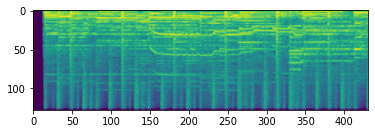

In [ ]:
create_melspectrogram("/content/Bob Marley - No Women No Cry (Original)-pHlSE9j5FGY.wav")

TypeError: ignored

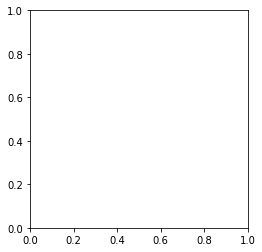

In [ ]:
y, sr = librosa.load("/content/Bob Marley - No Women No Cry (Original)-pHlSE9j5FGY.wav", duration=10)
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
fig = plt.Figure()


<PIL.Image.Image image mode=RGB size=432x288 at 0x7F80CAF257C0>


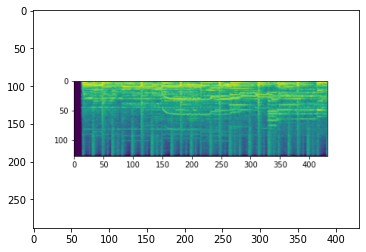

In [ ]:
image = load_img("/content/Bob Marley - No Women No Cry (Original)-pHlSE9j5FGY.wav.png")
plt.imshow(image)
print(image)


[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]]


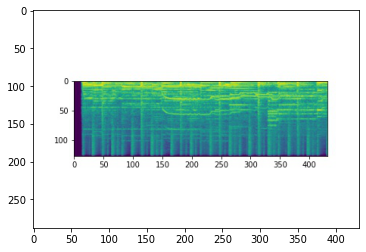

In [ ]:
image = load_img("/content/Bob Marley - No Women No Cry (Original)-pHlSE9j5FGY.wav.jpeg",color_mode='rgba',target_size=(288,432))
input_arr = img_to_array(image)



input_arr = input_arr/255
plt.imshow(input_arr)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr)

In [ ]:
prediction = model.predict(input_arr)
prediction
class_label = np.argmax(prediction)
print(class_label)

1/1 [==============================] - 0s 84ms/step
1


In [ ]:
def predict(image_data,model):

  print(image_data)
  image = img_to_array(image_data)

  image = np.reshape(image,(1,288,432,4))
  prediction = model.predict(image/255)
  print(prediction)
  prediction = prediction.reshape((10,)) 


  class_label = np.argmax(prediction)
  print(class_label)
  
  return class_label,prediction

In [ ]:
def show_output(songname):
  create_melspectrogram(songname) 
  image_data = load_img(f'{songname}'+'.jpeg',color_mode='rgba',target_size=(288,432))
  

  class_label,prediction = predict(image_data,model)

  print("The Genre of Song is "+genres_musicaux[class_label])

  fig,ax= plt.subplots(figsize=(6,4.5))
  ax.bar(x=genres_musicaux,height=prediction)
  plt.xticks(rotation=45)
  ax.set_title("Probability Distribution Of The Given Song Over Different Genres")

  plt.show()


  

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F80CF588850>
1/1 [==============================] - 0s 61ms/step
[[0.07291626 0.50830156 0.01965559 0.01866955 0.02186399 0.04786033
  0.26123363 0.00974363 0.0165517  0.02320378]]
1
The Genre of Song is classical


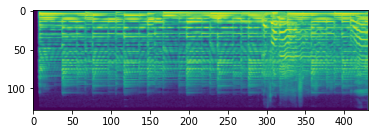

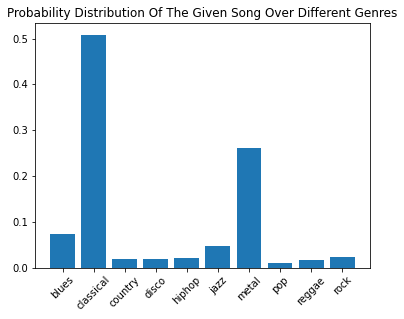

In [ ]:
show_output("/content/LES JONES - BURGERS-ws3WGmINlIg.wav")

1/1 [==============================] - 0s 54ms/step
1
The Genre of Song is classical


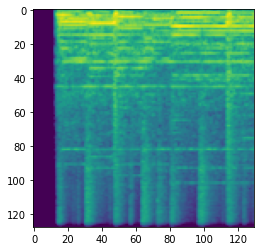

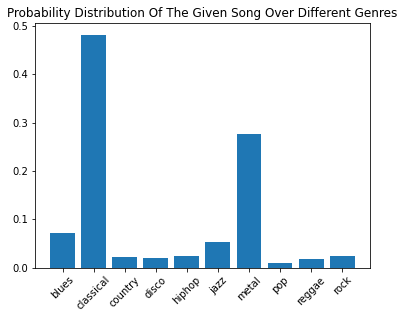

In [ ]:
show_output("/content/Bob Marley - No Women No Cry (Original)-pHlSE9j5FGY.wav")

1/1 [==============================] - 0s 51ms/step
1
The Genre of Song is classical


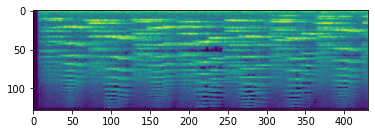

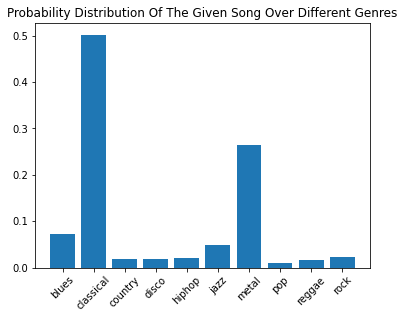

In [ ]:
show_output('/content/Mozart - Lacrimosa-k1-TrAvp_xs.wav')